In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values / 255.0
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
Y_test = test_data.iloc[:, 0].values

# One-hot encode labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Reshape input data to match image format (28x28 pixels, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


ModuleNotFoundError: No module named 'tensorflow.python'

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


C:\Users\Aseem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0589 - val_accuracy: 0.9183 - val_loss: 0.3275
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0502 - val_accuracy: 0.9204 - val_loss: 0.3225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0394 - val_accuracy: 0.9178 - val_loss: 0.3458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0356 - val_accuracy: 0.9203 - val_loss: 0.3616
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0325 - val_accuracy: 0.9185 - val_loss: 0.3921
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9221 - val_loss: 0.3969
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0246 - val_accuracy: 0.9179 - val_loss: 0.4341
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9924 - loss: 0.0224 - 

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9152 - loss: 0.5129
Test Set Accuracy: 91.75%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


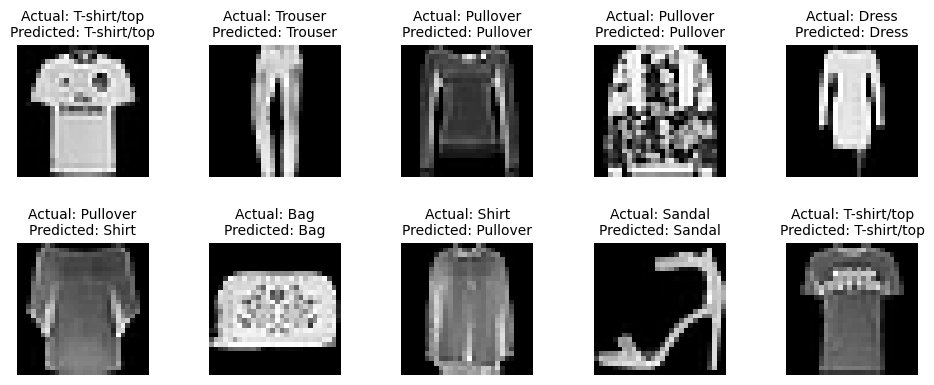

Accuracy: 91.75%


In [19]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_classes(X):
    predictions = model.predict(X)
    return np.argmax(predictions, axis=1)

predicted_classes = predict_classes(X_test)
actual_classes = np.argmax(Y_test, axis=1)

# Plot actual vs predicted images
def plot_images(images, actual, predicted, class_labels):
    plt.figure(figsize=(12, 12))
    for i in range(10):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Actual: {class_labels[actual[i]]}\nPredicted: {class_labels[predicted[i]]}", fontsize=10)
        plt.axis('off')
        plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots
    plt.show()


plot_images(X_test, actual_classes, predicted_classes, class_labels)

# Calculate accuracy
accuracy = np.sum(predicted_classes == actual_classes) / actual_classes.size
print(f"Accuracy: {accuracy * 100:.2f}%")